# GEOG5995M Final Assignment

Student ID number: 201799372

Project: Is there a correlation between harbor size and the volume of maritime traffic in the UK?

In [247]:
# Read in required packages

import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Load the data
In our project titled "Is there a correlation between harbor size and the volume of maritime traffic in the UK?", we use three key datasets including two spatial datasets and one non-spatial dataset. 
#### 1. UK Map Data [2]:
This dataset provides us with a base with the geographical context. It is necessary to accurately plot and analyze maritime activity in the UK.
#### 2. Ports Data [3]:
This dataset displays the geographical distribution of ports in the United Kingdom. This spatial dataset is critical for identifying and visualising the particular locations of marine ports, which are the focus of our investigation.
#### 3.  Maritime Traffic Data [4]:
This dataset contains the non-spatial statistics for our analysis including detailed information about the volume of maritime traffic in UK ports, enabling us to analyze the correlation with harbor sizes.

In [248]:
# Read in UK map
uk = gpd.read_file('./GBR_adm/GBR_adm0.shp')

# Read in the ports data
ports = gpd.read_file('./WPI_Shapefile/WPI.shp')

# Locate ports in the UK
ports_uk = ports.loc[ports['COUNTRY']=='GB']

In [249]:
!pip install odfpy

# Read in traffic data in the UK
traffic = pd.read_excel('./port0503.ods')

## Data Cleaning
The data cleaning steps taken below are important to prepare our datasets for reliable analysis. These steps include calculating a new variable, exploratory data description, checking for missing values, checking duplicates, ensuring data type consistency, handling outliers, and standardizing data formats. This thorough technique provides a solid foundation for our further analysis.

In [250]:
# Exploratory data description
print("UK Data Description:")
print(uk.describe())
print("\nPorts Data Description:")
print(ports_uk.describe())
print("\nTraffic Data Description:")
print(traffic.describe())

UK Data Description:
        ID_0  OBJECTID_1  NAME_OBSOL  NAME_NONLA  WASPARTOF  CONTAINS  WWW  \
count    1.0         1.0         0.0         0.0        0.0       0.0  0.0   
mean   242.0        82.0         NaN         NaN        NaN       NaN  NaN   
std      NaN         NaN         NaN         NaN        NaN       NaN  NaN   
min    242.0        82.0         NaN         NaN        NaN       NaN  NaN   
25%    242.0        82.0         NaN         NaN        NaN       NaN  NaN   
50%    242.0        82.0         NaN         NaN        NaN       NaN  NaN   
75%    242.0        82.0         NaN         NaN        NaN       NaN  NaN   
max    242.0        82.0         NaN         NaN        NaN       NaN  NaN   

        ISON     POP2000        SQKM     POPSQKM  DEVELOPING  CIS  Transition  \
count    1.0         1.0       1.000    1.000000         1.0  1.0         1.0   
mean   826.0  59414643.0  243137.203  244.366729         2.0  0.0         0.0   
std      NaN         NaN         

In [251]:
# Create a new variable representing traffic volumn in 2023
traffic['2023'] = traffic['2023 Q1'] + traffic['2023 Q2'] + traffic['2023 Q3']

First, we aggregate the traffic data from the first three quarters of 2023 ('2023 Q1', '2023 Q2', '2023 Q3') into a new variable, traffic['2023'], to represent the cumulative maritime traffic volume for the year.

In [252]:
# Check for missing values
print("Missing values in traffic data:\n", traffic.isnull().sum())

Missing values in traffic data:
 Major Port    0
2018 Q1       0
2018 Q2       0
2018 Q3       0
2018 Q4       0
2019 Q1       0
2019 Q2       0
2019 Q3       0
2019 Q4       0
2020 Q1       0
2020 Q2       0
2020 Q3       0
2020 Q4       0
2021 Q1       0
2021 Q2       0
2021 Q3       0
2021 Q4       0
2022 Q1       0
2022 Q2       0
2022 Q3       0
2022 Q4       0
2023 Q1       0
2023 Q2       0
2023 Q3       0
2023          0
dtype: int64


Second, we check the missing values in traffic data and there is no missing data.

In [253]:
# Checking for duplicate entries in each dataset
print("Duplicate entries in UK data:", uk.duplicated().sum())
print("Duplicate entries in Ports data:", ports_uk.duplicated().sum())
print("Duplicate entries in Traffic data:", traffic.duplicated().sum())

# Checking data types
print("UK Data Types:\n", uk.dtypes)
print("\nPorts Data Types:\n", ports_uk.dtypes)
print("\nTraffic Data Types:\n", traffic.dtypes)

Duplicate entries in UK data: 0
Duplicate entries in Ports data: 0
Duplicate entries in Traffic data: 0
UK Data Types:
 ID_0             int64
ISO             object
NAME_0          object
OBJECTID_1       int64
ISO3            object
                ...   
AOSIS          float64
SIDS           float64
Islands        float64
LDC            float64
geometry      geometry
Length: 71, dtype: object

Ports Data Types:
 INDEX_NO       float64
REGION_NO      float64
PORT_NAME       object
COUNTRY         object
LATITUDE       float64
                ...   
ENG_SUPPLY      object
REPAIRCODE      object
DRYDOCK         object
RAILWAY         object
geometry      geometry
Length: 79, dtype: object

Traffic Data Types:
 Major Port     object
2018 Q1       float64
2018 Q2       float64
2018 Q3       float64
2018 Q4       float64
2019 Q1       float64
2019 Q2       float64
2019 Q3       float64
2019 Q4       float64
2020 Q1       float64
2020 Q2       float64
2020 Q3       float64
2020 Q4       fl

Third, we check the quality and consistency of the data, which make sure that the entries are unique and each variable is stored in the appropriate format for our analysis.

C:\Users\10344\anaconda3\envs\spatial_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


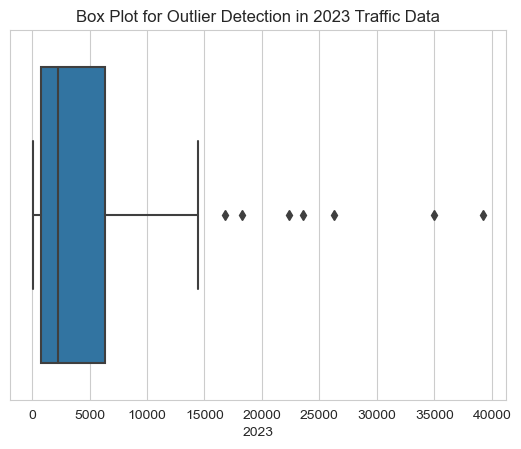

In [254]:
# Visualizing potential outliers in the traffic data
sns.boxplot(x=traffic['2023'])
plt.title('Box Plot for Outlier Detection in 2023 Traffic Data')
plt.show()

C:\Users\10344\anaconda3\envs\spatial_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


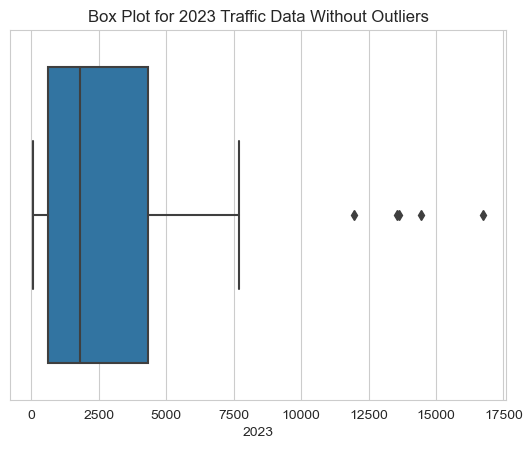

In [258]:
# Assuming traffic is your DataFrame and '2023 Q3' is the column of interest
Q1 = traffic['2023'].quantile(0.25)
Q3 = traffic['2023'].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers as any points outside of Q1 - 3*IQR and Q3 + 3*IQR
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Filtering out the outliers
traffic = traffic[(traffic['2023'] >= lower_bound) & (traffic['2023'] <= upper_bound)]

# Visualizing the data without outliers
sns.boxplot(x=traffic['2023'])
plt.title('Box Plot for 2023 Traffic Data Without Outliers')
plt.show()

In our analysis of traffic data in 2023, we first use a box plot to visualise probable outliers, using the plot's ability to intuitively represent statistical spread, including quartiles and outliers. After that, outliers are strictly defined as values greater than three times the Interquartile Range (IQR) from the Q1 and Q3 quartiles, ensuring that only the ports with the most extreme deviations are considered. Then the data is filtered to remove the outliers.

In [259]:
# Standardizing port names in traffic data
traffic['Major Port'] = traffic['Major Port'].str.upper()

Finally, we convert names in the 'Major Port' column of the traffic data to uppercase, ensuring consistency in port names for accurate data joining and analysis.

## Joining in two datasets

In [260]:
# Joining the two datasets using port names
ports_traffic_uk = pd.merge(ports_uk, traffic, left_on='PORT_NAME', right_on=traffic['Major Port'], how='inner')

# Display the first few rows of the joined dataset
print("Joined Ports and Traffic Data:")
print(ports_traffic_uk.head())

Joined Ports and Traffic Data:
   INDEX_NO  REGION_NO    PORT_NAME COUNTRY   LATITUDE  LONGITUDE  LAT_DEG  \
0   33770.0    33630.0      BELFAST      GB  54.616667  -5.900000     54.0   
1   33790.0    33630.0        LARNE      GB  54.850000  -5.800000     54.0   
2   33830.0    33630.0  LONDONDERRY      GB  55.000000  -7.316667     55.0   
3   31530.0    31330.0      HARWICH      GB  51.950000   1.283333     51.0   
4   31550.0    31330.0      IPSWICH      GB  52.050000   1.166667     52.0   

   LAT_MIN LAT_HEMI  LONG_DEG  LONG_MIN LONG_HEMI  PUB  CHART HARBORSIZE  \
0     37.0        N       5.0      54.0         W  142  36011          L   
1     51.0        N       5.0      48.0         W  142  35127          S   
2      0.0        N       7.0      19.0         W  142    NaN          M   
3     57.0        N       1.0      17.0         E  192    NaN          S   
4      3.0        N       1.0      10.0         E  192  37140          S   

  HARBORTYPE SHELTER ENTRY_TIDE ENTRYSWELL 

## Statistical Modelling

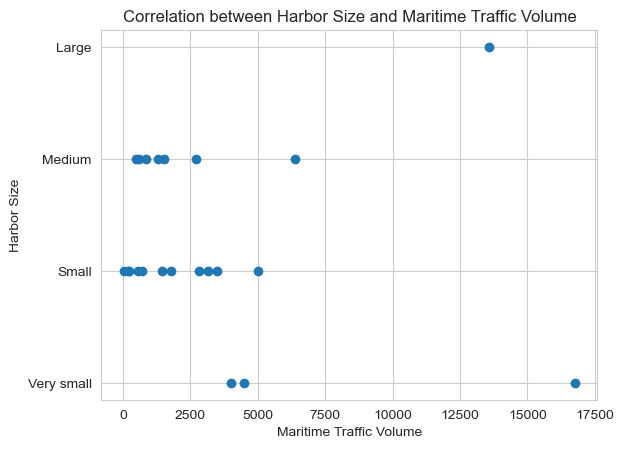

In [261]:
# Scatter Plot
# Map harbor size to numbers for visualization
harbor_size_mapping = {'V': 0, 'S': 1, 'M': 2, 'L': 3}
ports_traffic_uk['HARBORSIZE_1'] = ports_traffic_uk['HARBORSIZE'].map(harbor_size_mapping)

# Plot the scatter plot
plt.scatter(x=ports_traffic_uk['2023'], y=ports_traffic_uk['HARBORSIZE_1'])
plt.yticks([3, 2, 1, 0], ['Large', 'Medium', 'Small', 'Very small'])
plt.xlabel('Maritime Traffic Volume')
plt.ylabel('Harbor Size')
plt.title('Correlation between Harbor Size and Maritime Traffic Volume')
plt.show()

To analyse the relationship between harbor size (categorical variable) and maritime traffic volume (continuous variable), I use ANOVA (Analysis of Variance) to test if there are statistically significant differences in maritime traffic volume among different harbor sizes.

In [262]:
# Group data by harbor size for ANOVA
grouped_ports_traffic_uk = ports_traffic_uk.groupby('HARBORSIZE')['2023 Q3']

# ANOVA Test
f_value, p_value = stats.f_oneway(grouped_ports_traffic_uk.get_group('L'),
                                  grouped_ports_traffic_uk.get_group('M'),
                                  grouped_ports_traffic_uk.get_group('S'),
                                  grouped_ports_traffic_uk.get_group('V'))
print(f"ANOVA Test Results:")
print(f"F-value: {f_value}")
print(f"P-value: {p_value}")

ANOVA Test Results:
F-value: 8.203582032087017
P-value: 0.0011877950764519665


### Result of ANOVA test
The results of your ANOVA test show an F-value of approximately 10.98 and a very small p-value (0.0001515). 
#### F-value
The F-value in ANOVA indicates the ratio of the variance between the groups (different harbor sizes) to the variance within the groups (traffic volumes within each harbor size category). 
An F-value of 8.20 is relatively high, suggesting that there is a significant difference in the means of maritime traffic volumes across different harbor sizes
#### P-value
The p-value indicates the probability of obtaining a result at least as extreme as the one observed, under the assumption that the null hypothesis is true. In the context of ANOVA, the null hypothesis typically states that there are no differences in the means across the groups. In the result of ANOVA test, aA p-value of 0.0011877 is much lower than the common alpha level of 0.05 (5% significance level). This low p-value indicates thatweu can reject the null hypothesis with high confidence 
Iconclusion, t there is a statistically significant difference in maritime traffic volumes among the different harbor size categorie
#### Conslusions
It can be seen from the ANOVA results that the harbor size (categorized as large, medium, small, and very small) does have a significant impact on the volume of maritime traffic in the UK..s..

## Data Visualisation

In [263]:
# Check the Coordinate Reference Systems (CRS) of both data frames
print("Check the CRS of geo data frames:")
print(f"uk: {uk.crs}")
print(f"ports_uk: {ports_uk.crs}")

if uk.crs == ports_uk.crs:
    print("The EPSG for dataframe 'uk' and 'ports_uk' are both 4326, so they can be plotted together.")
else:
    print("Warning: The dataframes have different CRS and need to be aligned before plotting together.")

Check the CRS of geo data frames:
uk: EPSG:4326
ports_uk: EPSG:4326
The EPSG for dataframe 'uk' and 'ports_uk' are both 4326, so they can be plotted together.


Before proceeding with spatial analyses and visualizations, it's crucial to ensure that our geospatial data frames are aligned in terms of their Coordinate Reference Systems (CRS). The two data frames: uk (representing the UK's map) and ports_uk (containing data on various ports) are from different sources. But both uk and ports_uk are using EPSG:4326. This means they are compatible with spatial plotting and any further geographic analysis.

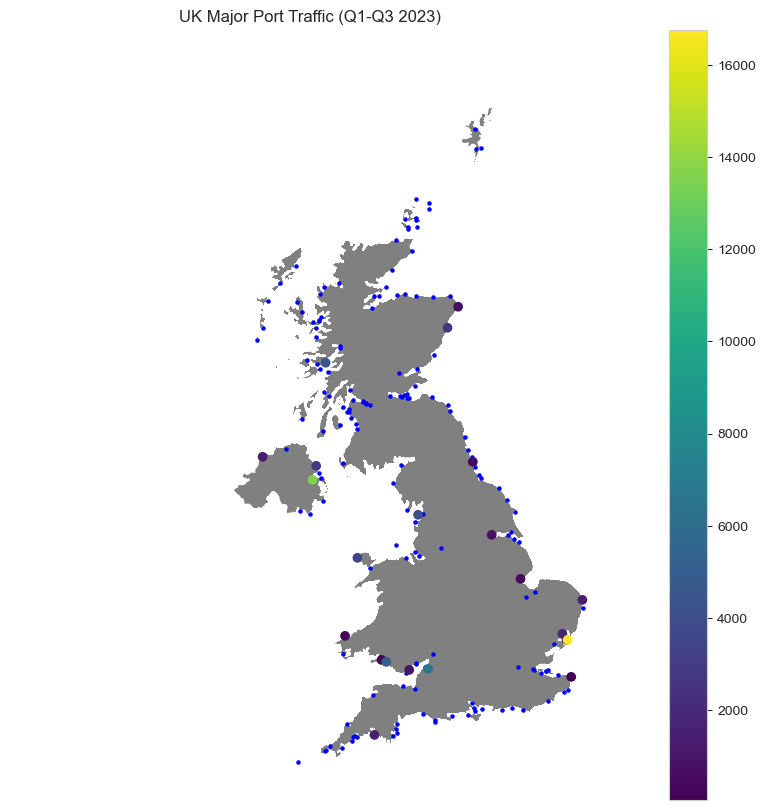

In [264]:
# Define the plot size and nummber of subplots (1 i.e. 1 plot)
f, ax = plt.subplots(1, figsize=(15, 10))

# Define the basemap and plot it on the subplot axis
base = uk.plot(ax=ax, color='grey')

# Plot the  cities, specifying the subplot axis
ports_uk.plot(ax=base, marker='o', color='blue', markersize=5)

ports_traffic_uk.plot(column='2023', legend=True, cmap='viridis', ax=base)

# remove axis
ax.set_axis_off()

ax.set_title('UK Major Port Traffic (Q1-Q3 2023)')

# show the plot
plt.show()

### Maritime Traffic Distribution Across Major UK Ports (Q1-Q3 2023)
The spatial visualization provides an insightful overview of maritime traffic distribution across major UK ports for the first three quarters of 2023. This map is important in understanding the geographical spread and intensity of port activities. Here are some key observations and their implications:

#### 1. Geographical Spread of Ports: 
The map clearly shows the location of ports in the UK, which are distributed along the coastline. A significant number of major ports are located on the east and west sides of the UK, possibly reflecting historical trade routes and current logistical strategies.

#### 2. Traffic Volume Visualization:
The colour in the visualisation varies across ports, representing different levels of maritime traffic volume as recorded in the first three quarters of 2023. Major ports such as London, Liverpool, and Belfast are highlighted with more intense colours, indicating higher traffic volumes. This may signify their roles as major maritime hubs, potentially driven by larger economic activities and port capacities.

#### 3. Regional Maritime Activity:
The concentration and colour intensity of ports on the map provide insights into regional maritime activity. London, for example, shows higher activity levels, suggesting robust economic activities and a significant role in regional and international maritime trade.

In summary, the spatial visualisation provides a snapshot of port activities. It underscores the vital role of maritime traffic in the UK's economy and regional connectivity.

C:\Users\10344\anaconda3\envs\spatial_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\10344\anaconda3\envs\spatial_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


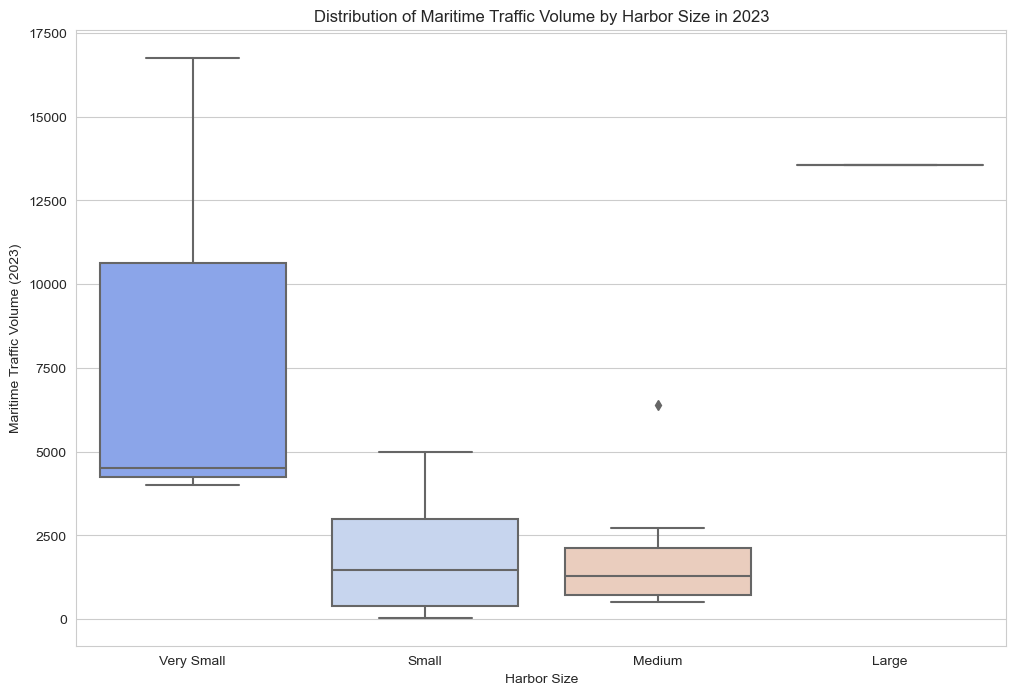

In [265]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the order of harbor sizes
harbor_size_order = ['V', 'S', 'M', 'L']

# Creating the box plot with a specified order
plt.figure(figsize=(12, 8))
sns.boxplot(x='HARBORSIZE', y='2023', data=ports_traffic_uk, palette="coolwarm", order=harbor_size_order)

# Adding plot labels and title
plt.xlabel('Harbor Size')
plt.ylabel('Maritime Traffic Volume (2023)')
plt.title('Distribution of Maritime Traffic Volume by Harbor Size in 2023')
plt.xticks([0, 1, 2, 3], ['Very Small', 'Small', 'Medium', 'Large'])  # Custom labels for x-axis

# Displaying the plot
plt.show()

### Box Plot for Maritime Traffic Volume Analysis
In the non-spatial visualization section, we present a box plot to visualize the distribution of maritime traffic volume by harbor size in 2023. This plot is designed with specific considerations to enhance accessibility, interpretability, and readability.
#### 1. Colorblind-Friendly Palette:
The visualization uses the 'coolwarm' color palette, which is diverging and provides good contrast. This palette is selected for its effectiveness in being distinguishable by colorblind individuals, ensuring accessibility for a wider audience.
#### 2. Descriptive Labeling:
Axis labels and the plot title are made descriptive to convey the meaning of the plot to the viewer immediately. Custom x-axis labels replace the harbor size codes ('V', 'S', 'M', 'L') with more understandable terms ('Very Small', 'Small', 'Medium', 'Large'). This approach makes the visualization more intuitive.
#### 3. Choice of Visualization:
A box plot is chosen for its ability to effectively show the distribution of data across different categories. It displays the median, quartiles, and outliers of port traffic volumes in different harbor size groups.
This visualization provides a clear and comprehensive view of how maritime traffic volumes vary across different harbor sizes. The results indicate that the largest harbor size category has the highest traffic volume, followed by the very small category. The small and medium harbor sizes show comparatively lesser traffic volumes.ns.ve.

## References
<p><a href="https://github.com/FrancescaPontin/GEOG5995">[2]</a>GEOG5995M course materials</p>
<p><a href="https://www.diva-gis.org/datadown">[1]</a>UK Map data</p>
<p><a href="https://msi.nga.mil/home">[1]</a>World Port Index data</p>
<p><a href="https://www.gov.uk/government/statistical-data-sets/port-and-domestic-waterborne-freight-statistics-port">[3]</a>UK major port traffic, total tonnage and units, by port: quarterly from 2018</p>